Rules:

In [141]:
rem_warnings = True

Investment parameters (weeks):

In [142]:
horizon = 156 #weeks
horizon_max = 156 #3Y
scale = 56 #1Y

Statistical parameters:

In [143]:
p = 0.95 #quantile

Drop warnings:

In [144]:
import warnings
if rem_warnings is True:
    warnings.filterwarnings('ignore')

Libraries:

In [145]:
import pandas as pd
import numpy as np
import scipy as sc
import math
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

Read data:

In [146]:
df_sap = pd.read_csv('data/sap.csv', delimiter=',', names=['date', 'time', 'open', 'high', 'low', 'close', 'volume'])
df_gold = pd.read_csv('data/gold.csv', delimiter=',', names=['date', 'time', 'open', 'high', 'low', 'close', 'volume'])

Drop columns:

In [147]:
df_sap = df_sap.dropna(how='any', axis=0)[['date', 'close']].rename(columns={'close': 'close_sap'})
df_gold = df_gold.dropna(how='any', axis=0)[['date', 'close']].rename(columns={'close': 'close_gold'})

Merging:

In [148]:
df = pd.merge(df_sap, df_gold, on='date')
df.dropna(how='any', axis=0, inplace=True)

Returns definition:

In [149]:
df[['return_sap', 'return_gold']] = df[['close_sap', 'close_gold']].apply(np.log)
df[['return_sap', 'return_gold']] = 100*df[['return_sap', 'return_gold']].diff(periods=horizon)
df = df.tail(len(df) - horizon_max)

Dates:

In [150]:
print('Start date:', str(list(df['date'])[0]))
print('End date:', str(list(df['date'])[-1]))

Start date: 2001.09.02
End date: 2019.10.20


Description:

In [151]:
df[['return_sap', 'return_gold']].describe()

,return_sap,return_gold
count,937.000000,937.000000
mean,11.643483,25.547945
std,28.418720,31.631553
min,-63.075086,-48.434687
25%,-10.708825,2.176428
50%,23.787567,33.199436
75%,33.139751,51.795659
max,69.323491,88.236960


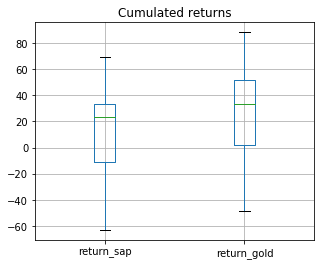

In [152]:
df[['return_sap', 'return_gold']].boxplot(grid=True, figsize=(5,4))
plt.title('Cumulated returns')
plt.show()

Statistics:

In [153]:
return_sap, return_gold  = int(round(df['return_sap'].median())), int(round(df['return_gold'].median())) 
var_sap = int(round(df[df['return_sap'] < 0]['return_sap'].abs().quantile(p)))
var_gold = int(round(df[df['return_gold'] < 0]['return_gold'].abs().quantile(p)))

Risk statistics:

In [154]:
print('VaR SP500:', var_sap, '%')
print('VaR Gold:', var_gold, '%')

VaR SP500: 49 %
VaR Gold: 44 %


Trend statistics:

In [155]:
print('Trend regime SP500:' ,int(round(100*df['return_sap'].autocorr(lag=1))), '%')
print('Trend regime Gold:' ,int(round(100*df['return_gold'].autocorr(lag=1))), '%')

Trend regime SP500: 99 %
Trend regime Gold: 99 %


Return statistics, annual:

In [156]:
print('Med. return (1Y) SP500:', int(round(return_sap/(horizon/scale))), '%')
print('Med. return (1Y) GOLD:', int(round(return_gold/(horizon/scale))), '%')

Med. return (1Y) SP500: 9 %
Med. return (1Y) GOLD: 12 %


Return at Risk statistics:

In [157]:
print('Return at Risk SAP:', round(return_sap/var_sap, 2))
print('Return at Risk GOLD:', round(return_gold/var_gold, 2))

Return at Risk SAP: 0.49
Return at Risk GOLD: 0.75
